In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import FeedforwardNeuralNetModel
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Greece/GRE_culex_2011_2023.csv')
#=====================================================================
data = data[data.nuts2_name == 'CENTRAL MACEDONIA']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['x', 'y', 'dt_placement',
           'culex spp.', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/greece_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/greece_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['trap_id', 'station_id', 'x', 'y', 'dt_placement', 'week', 'month',
       'year', 'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code',
       'nuts1_name', 'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex spp.',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_m

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'NN mosq regression'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Resuts/Greece/Central Macedonia/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'mosquito_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, dropna=True)

In [7]:
model = FeedforwardNeuralNetModel(num_features=len(data.iloc[0,:])-2, num_class=1,
                                  hidden_layers = [264,128,128,64,32], model_type=model_type, learning_rate = 0.001,
                                  epochs = 100, batch_size = 128, embedding_data=embedded_data,
                                  dropout=0.2, transformation_list=transformation_list,
                                  early_stop = None, l1_weight=0, l2_weight=0, weights=False)

Epoch 001: | Train Loss: 169884.14128 | Val Loss: 451115.69661 | Train Acc: 242.414| Val Acc: 314.297
Epoch 002: | Train Loss: 168314.56087 | Val Loss: 448484.25911 | Train Acc: 241.187| Val Acc: 312.894
Epoch 003: | Train Loss: 166956.89551 | Val Loss: 446849.11979 | Train Acc: 240.164| Val Acc: 312.110
Epoch 004: | Train Loss: 165544.57422 | Val Loss: 444452.99349 | Train Acc: 239.046| Val Acc: 310.731
Epoch 005: | Train Loss: 163912.76758 | Val Loss: 442600.37891 | Train Acc: 237.813| Val Acc: 309.749
Epoch 006: | Train Loss: 162291.36768 | Val Loss: 440359.83464 | Train Acc: 236.458| Val Acc: 308.571
Epoch 007: | Train Loss: 160367.13151 | Val Loss: 437081.73438 | Train Acc: 235.009| Val Acc: 306.694
Epoch 008: | Train Loss: 158298.15007 | Val Loss: 434526.58464 | Train Acc: 233.383| Val Acc: 305.309
Epoch 009: | Train Loss: 156137.42057 | Val Loss: 430996.35807 | Train Acc: 231.657| Val Acc: 303.123
Epoch 010: | Train Loss: 153763.99967 | Val Loss: 428408.82292 | Train Acc: 229.74

Epoch 082: | Train Loss: 23849.75470 | Val Loss: 247943.89714 | Train Acc: 103.226| Val Acc: 218.593
Epoch 083: | Train Loss: 24303.24929 | Val Loss: 253096.18620 | Train Acc: 103.160| Val Acc: 216.897
Epoch 084: | Train Loss: 24518.08067 | Val Loss: 249308.13346 | Train Acc: 103.885| Val Acc: 219.043
Epoch 085: | Train Loss: 24066.64583 | Val Loss: 250894.60482 | Train Acc: 103.184| Val Acc: 218.571
Epoch 086: | Train Loss: 23784.61017 | Val Loss: 248421.47656 | Train Acc: 102.745| Val Acc: 219.056
Epoch 087: | Train Loss: 23656.89199 | Val Loss: 247934.62891 | Train Acc: 103.370| Val Acc: 217.482
Epoch 088: | Train Loss: 23169.61068 | Val Loss: 249830.25716 | Train Acc: 102.757| Val Acc: 218.780
Epoch 089: | Train Loss: 23323.11863 | Val Loss: 247517.03581 | Train Acc: 101.803| Val Acc: 216.685
Epoch 090: | Train Loss: 23242.24125 | Val Loss: 251459.04948 | Train Acc: 102.117| Val Acc: 218.469
Epoch 091: | Train Loss: 23075.12903 | Val Loss: 246968.57161 | Train Acc: 101.263| Val Acc

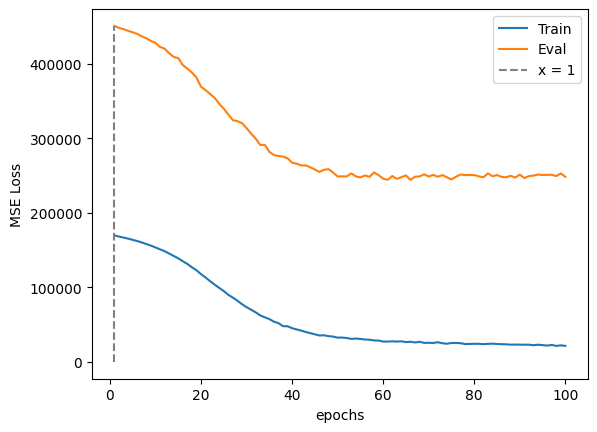

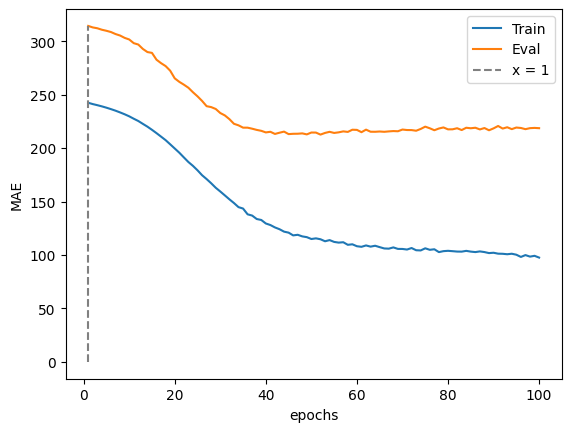

MAE on train set:  88.86637931034483
min prediction: 10
max prediction: 1449

MAE on test set:  218.4867256637168
Error <= 30: 21.99 %
min prediction: 9
max prediction: 1268


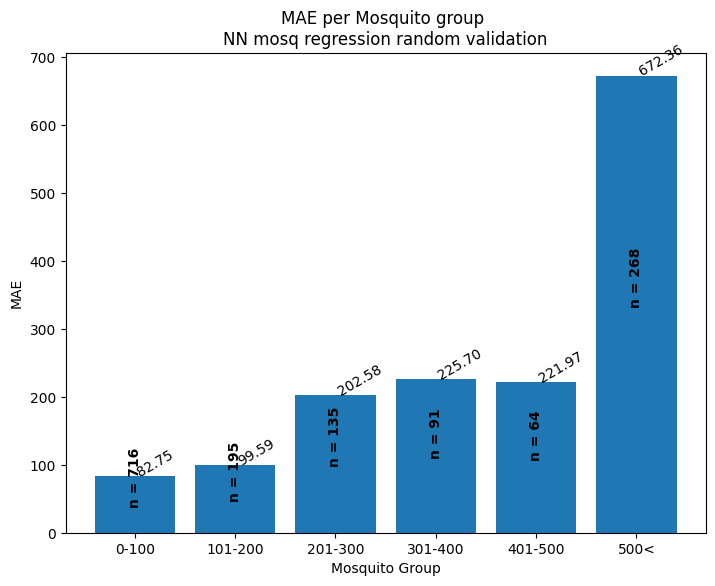

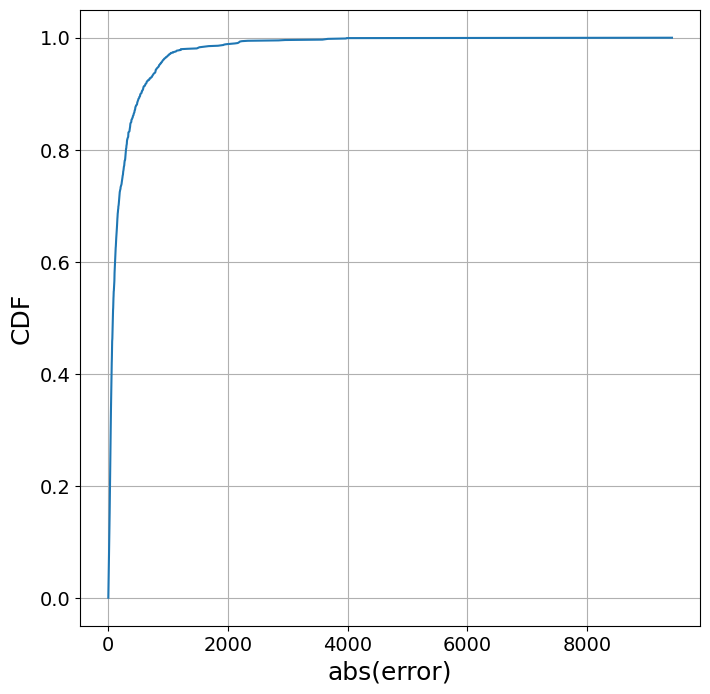

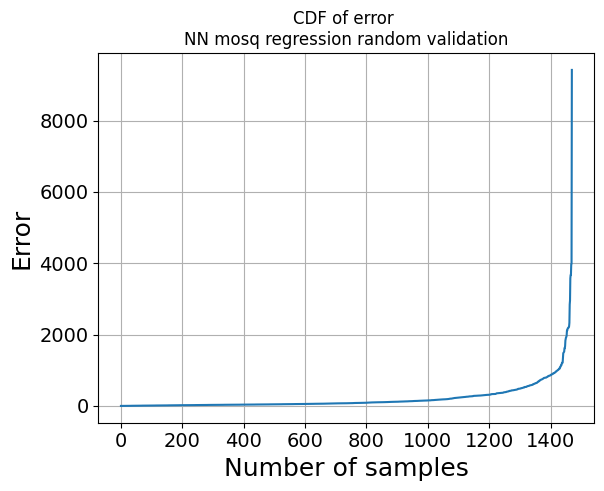

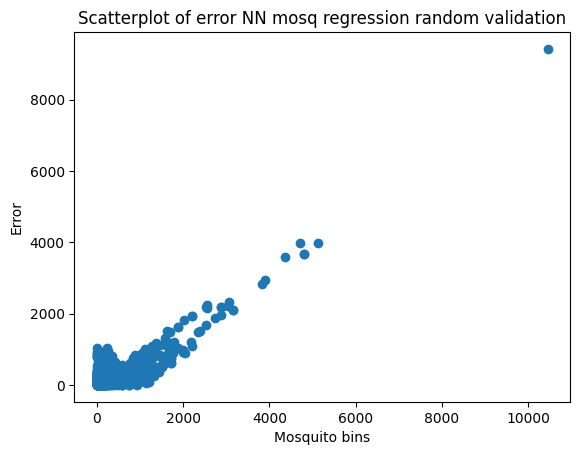

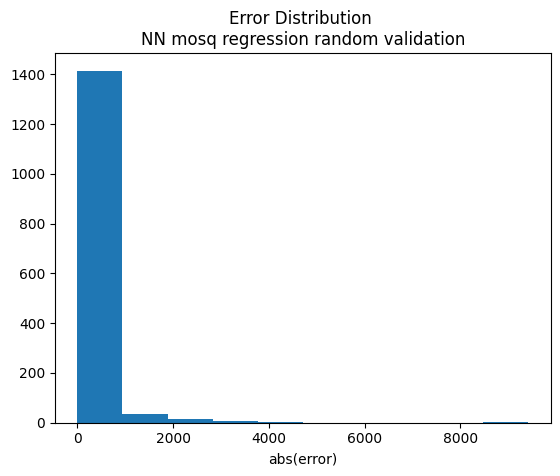

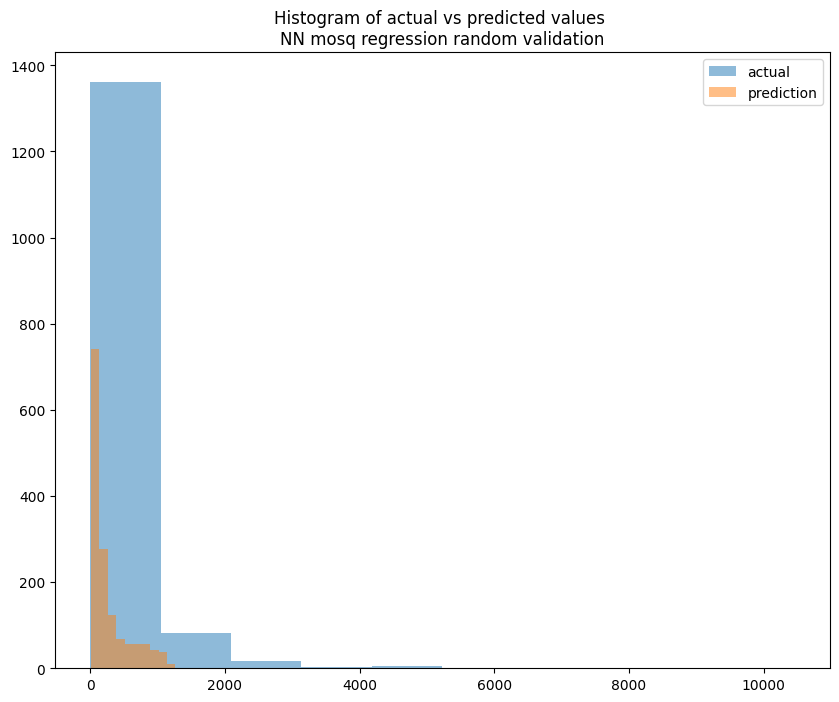

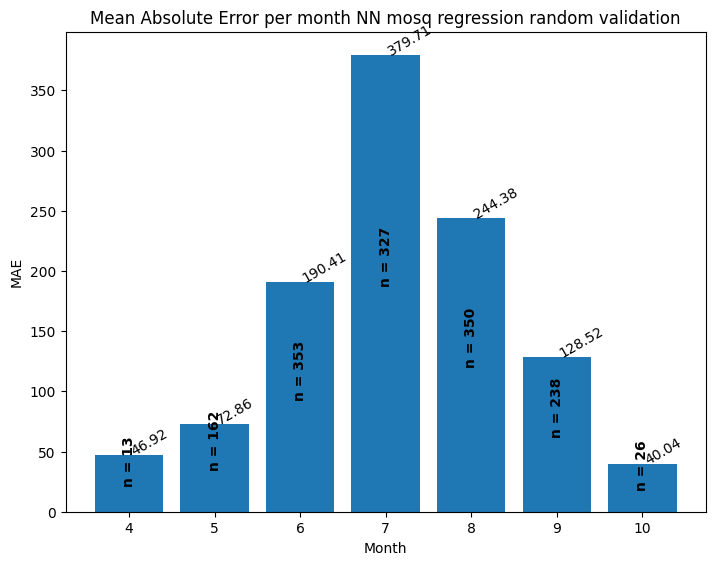

In [8]:
test_model_random_split(data, model, filepath = path, date_col = date_col, case=case_title, export=exp)

Epoch 001: | Train Loss: 177451.95928 | Val Loss: 272006.49154 | Train Acc: 249.092| Val Acc: 262.181
Epoch 002: | Train Loss: 175803.29537 | Val Loss: 270245.50553 | Train Acc: 247.809| Val Acc: 261.170
Epoch 003: | Train Loss: 174318.42052 | Val Loss: 268795.93132 | Train Acc: 246.731| Val Acc: 260.373
Epoch 004: | Train Loss: 172729.47356 | Val Loss: 266725.98177 | Train Acc: 245.511| Val Acc: 259.061
Epoch 005: | Train Loss: 170976.86734 | Val Loss: 264773.34831 | Train Acc: 244.156| Val Acc: 257.870
Epoch 006: | Train Loss: 169074.28020 | Val Loss: 262393.78743 | Train Acc: 242.628| Val Acc: 256.273
Epoch 007: | Train Loss: 166883.82136 | Val Loss: 259556.87956 | Train Acc: 240.925| Val Acc: 254.348
Epoch 008: | Train Loss: 164531.43104 | Val Loss: 257383.16471 | Train Acc: 239.002| Val Acc: 253.032
Epoch 009: | Train Loss: 162032.25316 | Val Loss: 254074.49447 | Train Acc: 237.020| Val Acc: 250.987
Epoch 010: | Train Loss: 159357.54357 | Val Loss: 250926.06120 | Train Acc: 234.89

Epoch 082: | Train Loss: 27096.17544 | Val Loss: 114140.99837 | Train Acc: 109.095| Val Acc: 181.993
Epoch 083: | Train Loss: 26029.72737 | Val Loss: 114587.47233 | Train Acc: 106.945| Val Acc: 182.072
Epoch 084: | Train Loss: 24827.86726 | Val Loss: 114864.66439 | Train Acc: 105.155| Val Acc: 180.119
Epoch 085: | Train Loss: 25893.48558 | Val Loss: 114889.74447 | Train Acc: 106.659| Val Acc: 180.116
Epoch 086: | Train Loss: 26082.84398 | Val Loss: 114285.08236 | Train Acc: 107.368| Val Acc: 180.819
Epoch 087: | Train Loss: 24959.39096 | Val Loss: 116208.47396 | Train Acc: 105.712| Val Acc: 184.074
Epoch 088: | Train Loss: 26062.88016 | Val Loss: 115615.95638 | Train Acc: 107.037| Val Acc: 181.866
Epoch 089: | Train Loss: 25300.42721 | Val Loss: 114966.97656 | Train Acc: 106.012| Val Acc: 182.114
Epoch 090: | Train Loss: 25033.22793 | Val Loss: 114401.77116 | Train Acc: 104.984| Val Acc: 180.296
Epoch 091: | Train Loss: 24188.06179 | Val Loss: 113699.09245 | Train Acc: 104.707| Val Acc

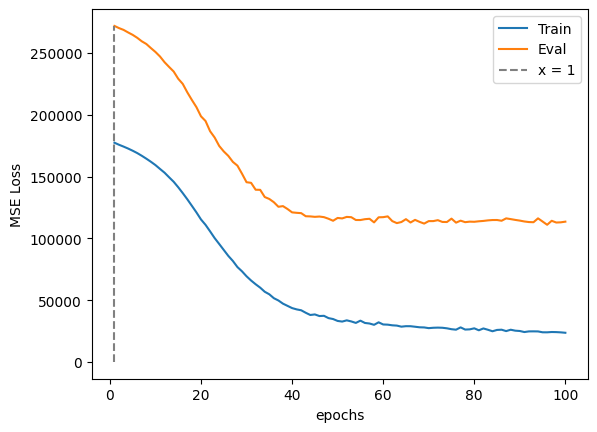

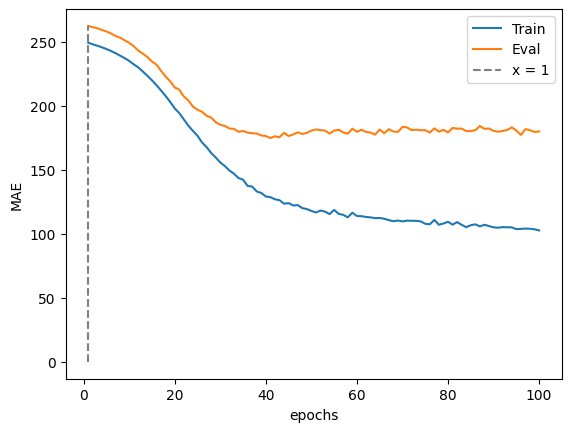

Epoch 001: | Train Loss: 179282.25331 | Val Loss: 286308.84375 | Train Acc: 250.555| Val Acc: 254.695
Epoch 002: | Train Loss: 177568.02794 | Val Loss: 284572.99089 | Train Acc: 249.236| Val Acc: 253.728
Epoch 003: | Train Loss: 176046.03380 | Val Loss: 283079.07031 | Train Acc: 248.127| Val Acc: 252.840
Epoch 004: | Train Loss: 174470.15745 | Val Loss: 281266.33594 | Train Acc: 246.875| Val Acc: 251.686
Epoch 005: | Train Loss: 172667.57587 | Val Loss: 279322.44857 | Train Acc: 245.494| Val Acc: 250.413
Epoch 006: | Train Loss: 170768.15535 | Val Loss: 277449.30859 | Train Acc: 244.016| Val Acc: 249.174
Epoch 007: | Train Loss: 168558.49489 | Val Loss: 274647.11328 | Train Acc: 242.331| Val Acc: 247.348
Epoch 008: | Train Loss: 166252.17413 | Val Loss: 271893.57096 | Train Acc: 240.421| Val Acc: 245.372
Epoch 009: | Train Loss: 163801.47401 | Val Loss: 269257.74154 | Train Acc: 238.496| Val Acc: 243.643
Epoch 010: | Train Loss: 160805.81671 | Val Loss: 264917.83073 | Train Acc: 236.24

Epoch 082: | Train Loss: 25982.78035 | Val Loss: 136290.95703 | Train Acc: 108.116| Val Acc: 184.717
Epoch 083: | Train Loss: 26780.15178 | Val Loss: 134792.64160 | Train Acc: 109.214| Val Acc: 182.758
Epoch 084: | Train Loss: 25383.99606 | Val Loss: 137522.44727 | Train Acc: 106.425| Val Acc: 185.916
Epoch 085: | Train Loss: 24760.72465 | Val Loss: 137683.56445 | Train Acc: 104.776| Val Acc: 187.680
Epoch 086: | Train Loss: 25705.98291 | Val Loss: 138854.27018 | Train Acc: 107.377| Val Acc: 189.295
Epoch 087: | Train Loss: 24533.78608 | Val Loss: 138343.41162 | Train Acc: 105.051| Val Acc: 185.064
Epoch 088: | Train Loss: 24877.65392 | Val Loss: 141327.05762 | Train Acc: 105.376| Val Acc: 187.932
Epoch 089: | Train Loss: 24567.58329 | Val Loss: 138903.56673 | Train Acc: 104.539| Val Acc: 187.659
Epoch 090: | Train Loss: 25196.52635 | Val Loss: 136988.22965 | Train Acc: 105.744| Val Acc: 187.142
Epoch 091: | Train Loss: 26020.21308 | Val Loss: 138936.68978 | Train Acc: 107.764| Val Acc

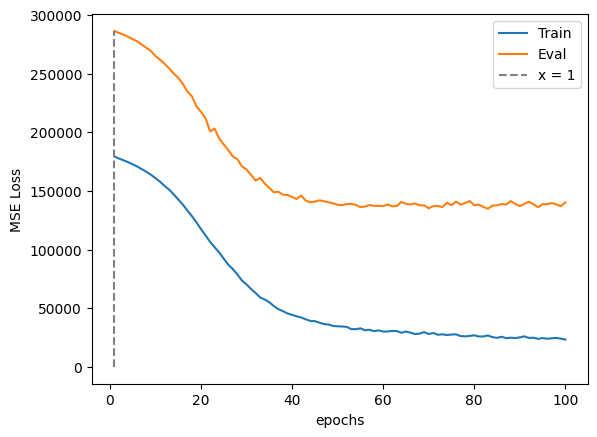

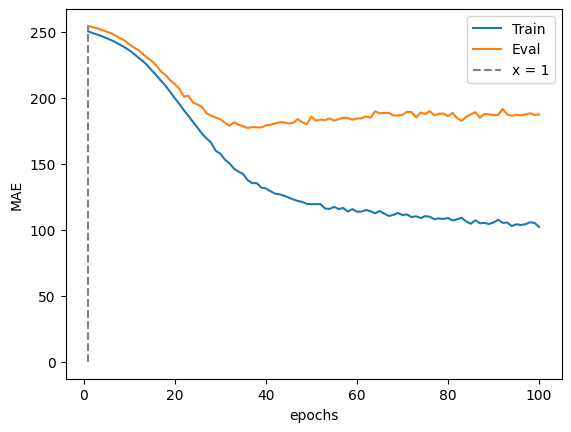

Epoch 001: | Train Loss: 172866.24820 | Val Loss: 369879.49609 | Train Acc: 244.730| Val Acc: 309.736
Epoch 002: | Train Loss: 171189.99204 | Val Loss: 367708.06055 | Train Acc: 243.422| Val Acc: 308.657
Epoch 003: | Train Loss: 169740.32797 | Val Loss: 365867.09766 | Train Acc: 242.315| Val Acc: 307.668
Epoch 004: | Train Loss: 168138.78230 | Val Loss: 363551.43880 | Train Acc: 241.085| Val Acc: 306.275
Epoch 005: | Train Loss: 166417.66316 | Val Loss: 361715.58464 | Train Acc: 239.723| Val Acc: 305.148
Epoch 006: | Train Loss: 164466.59916 | Val Loss: 359065.24870 | Train Acc: 238.245| Val Acc: 303.544
Epoch 007: | Train Loss: 162415.86073 | Val Loss: 355815.94336 | Train Acc: 236.548| Val Acc: 301.472
Epoch 008: | Train Loss: 160026.70673 | Val Loss: 351742.85547 | Train Acc: 234.730| Val Acc: 298.776
Epoch 009: | Train Loss: 157729.37545 | Val Loss: 348442.86133 | Train Acc: 232.770| Val Acc: 296.711
Epoch 010: | Train Loss: 154966.90941 | Val Loss: 345728.92188 | Train Acc: 230.58

Epoch 082: | Train Loss: 25706.79965 | Val Loss: 192556.67448 | Train Acc: 107.126| Val Acc: 216.224
Epoch 083: | Train Loss: 25866.23796 | Val Loss: 188556.53255 | Train Acc: 105.667| Val Acc: 213.978
Epoch 084: | Train Loss: 25466.07550 | Val Loss: 189460.35156 | Train Acc: 105.606| Val Acc: 213.080
Epoch 085: | Train Loss: 24841.41226 | Val Loss: 189370.68685 | Train Acc: 105.343| Val Acc: 213.595
Epoch 086: | Train Loss: 25151.37017 | Val Loss: 190818.32227 | Train Acc: 105.484| Val Acc: 214.033
Epoch 087: | Train Loss: 24944.67131 | Val Loss: 190420.35742 | Train Acc: 104.433| Val Acc: 212.394
Epoch 088: | Train Loss: 25023.52808 | Val Loss: 189643.54492 | Train Acc: 104.627| Val Acc: 212.605
Epoch 089: | Train Loss: 25242.80985 | Val Loss: 188992.18945 | Train Acc: 104.859| Val Acc: 211.852
Epoch 090: | Train Loss: 24310.13976 | Val Loss: 191048.57487 | Train Acc: 103.504| Val Acc: 215.272
Epoch 091: | Train Loss: 24273.77789 | Val Loss: 186401.57552 | Train Acc: 104.439| Val Acc

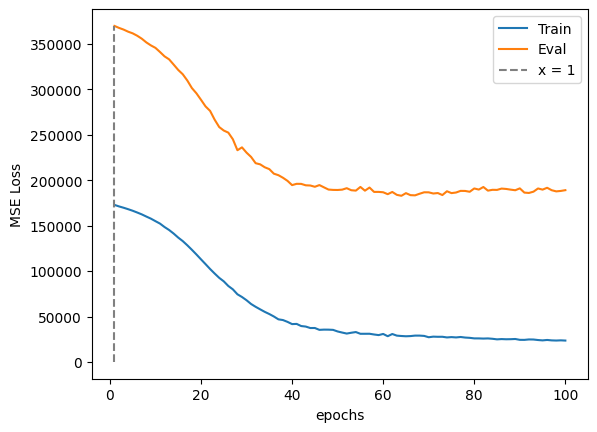

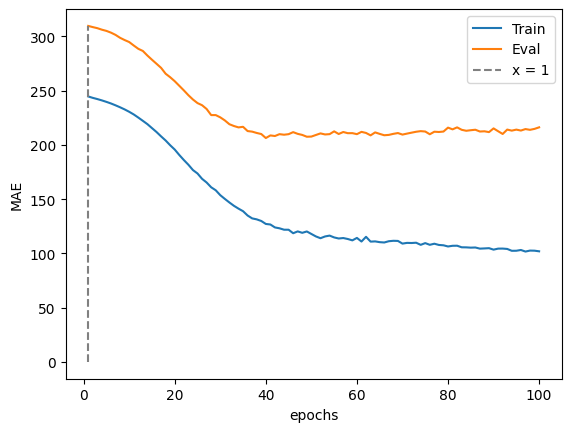

Epoch 001: | Train Loss: 175719.04312 | Val Loss: 350884.78743 | Train Acc: 247.303| Val Acc: 285.167
Epoch 002: | Train Loss: 174052.13822 | Val Loss: 348491.67806 | Train Acc: 245.999| Val Acc: 283.786
Epoch 003: | Train Loss: 172644.82903 | Val Loss: 346864.48145 | Train Acc: 244.942| Val Acc: 282.890
Epoch 004: | Train Loss: 171067.29462 | Val Loss: 344565.46533 | Train Acc: 243.753| Val Acc: 281.556
Epoch 005: | Train Loss: 169369.46019 | Val Loss: 342552.55257 | Train Acc: 242.464| Val Acc: 280.357
Epoch 006: | Train Loss: 167542.68374 | Val Loss: 339497.31217 | Train Acc: 241.017| Val Acc: 278.576
Epoch 007: | Train Loss: 165264.54853 | Val Loss: 336256.29329 | Train Acc: 239.248| Val Acc: 276.625
Epoch 008: | Train Loss: 163129.65445 | Val Loss: 333181.03841 | Train Acc: 237.390| Val Acc: 274.661
Epoch 009: | Train Loss: 160574.21169 | Val Loss: 329377.58236 | Train Acc: 235.477| Val Acc: 272.194
Epoch 010: | Train Loss: 157718.28591 | Val Loss: 325122.87972 | Train Acc: 233.25

Epoch 082: | Train Loss: 26733.46965 | Val Loss: 177854.18620 | Train Acc: 109.043| Val Acc: 201.570
Epoch 083: | Train Loss: 26436.82335 | Val Loss: 179203.59570 | Train Acc: 107.849| Val Acc: 199.173
Epoch 084: | Train Loss: 25818.48883 | Val Loss: 180295.63818 | Train Acc: 107.350| Val Acc: 200.162
Epoch 085: | Train Loss: 25723.37496 | Val Loss: 178994.10514 | Train Acc: 106.265| Val Acc: 200.204
Epoch 086: | Train Loss: 25294.33661 | Val Loss: 178496.11621 | Train Acc: 105.628| Val Acc: 198.247
Epoch 087: | Train Loss: 26341.00708 | Val Loss: 179170.63525 | Train Acc: 107.715| Val Acc: 198.866
Epoch 088: | Train Loss: 23671.98180 | Val Loss: 178658.62077 | Train Acc: 102.667| Val Acc: 199.242
Epoch 089: | Train Loss: 25595.80473 | Val Loss: 178862.78190 | Train Acc: 105.512| Val Acc: 199.803
Epoch 090: | Train Loss: 24553.92385 | Val Loss: 177844.99870 | Train Acc: 104.381| Val Acc: 200.249
Epoch 091: | Train Loss: 24176.84925 | Val Loss: 179720.10677 | Train Acc: 103.694| Val Acc

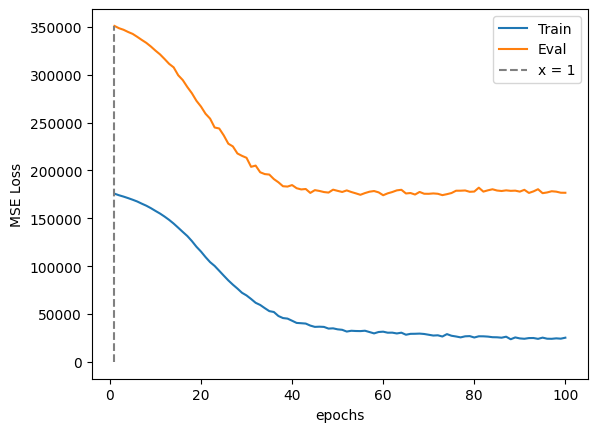

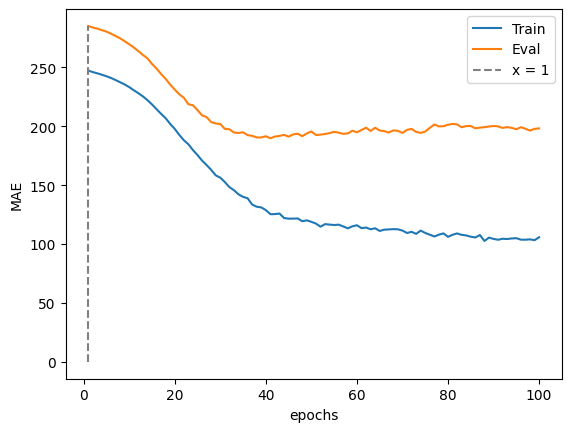

Epoch 001: | Train Loss: 174134.06040 | Val Loss: 501374.70801 | Train Acc: 246.388| Val Acc: 301.118
Epoch 002: | Train Loss: 172480.94712 | Val Loss: 499076.05111 | Train Acc: 245.111| Val Acc: 299.860
Epoch 003: | Train Loss: 170990.63131 | Val Loss: 497251.66992 | Train Acc: 244.016| Val Acc: 298.930
Epoch 004: | Train Loss: 169443.31641 | Val Loss: 495199.26042 | Train Acc: 242.796| Val Acc: 297.622
Epoch 005: | Train Loss: 167616.24684 | Val Loss: 493125.12891 | Train Acc: 241.430| Val Acc: 296.408
Epoch 006: | Train Loss: 165813.28125 | Val Loss: 489526.06803 | Train Acc: 239.960| Val Acc: 294.118
Epoch 007: | Train Loss: 163672.88807 | Val Loss: 486666.97233 | Train Acc: 238.227| Val Acc: 292.399
Epoch 008: | Train Loss: 161196.08474 | Val Loss: 484264.18978 | Train Acc: 236.308| Val Acc: 291.193
Epoch 009: | Train Loss: 158810.82437 | Val Loss: 481101.40853 | Train Acc: 234.429| Val Acc: 289.346
Epoch 010: | Train Loss: 156055.83774 | Val Loss: 477293.21126 | Train Acc: 232.25

Epoch 082: | Train Loss: 24690.15995 | Val Loss: 319811.87109 | Train Acc: 104.806| Val Acc: 214.174
Epoch 083: | Train Loss: 25206.14382 | Val Loss: 318075.29883 | Train Acc: 105.338| Val Acc: 212.840
Epoch 084: | Train Loss: 25353.57157 | Val Loss: 320513.49137 | Train Acc: 106.018| Val Acc: 215.191
Epoch 085: | Train Loss: 24772.69866 | Val Loss: 315510.64225 | Train Acc: 105.941| Val Acc: 213.151
Epoch 086: | Train Loss: 24359.16722 | Val Loss: 311504.82194 | Train Acc: 104.556| Val Acc: 210.773
Epoch 087: | Train Loss: 24552.71888 | Val Loss: 317131.88118 | Train Acc: 104.689| Val Acc: 212.660
Epoch 088: | Train Loss: 25066.28572 | Val Loss: 318743.13265 | Train Acc: 104.885| Val Acc: 211.378
Epoch 089: | Train Loss: 24473.74957 | Val Loss: 318647.08822 | Train Acc: 104.942| Val Acc: 211.315
Epoch 090: | Train Loss: 24932.46366 | Val Loss: 315545.10384 | Train Acc: 105.370| Val Acc: 212.141
Epoch 091: | Train Loss: 24169.28946 | Val Loss: 318140.85319 | Train Acc: 104.950| Val Acc

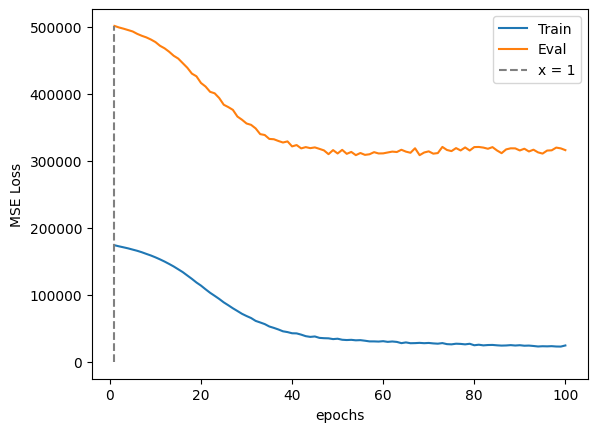

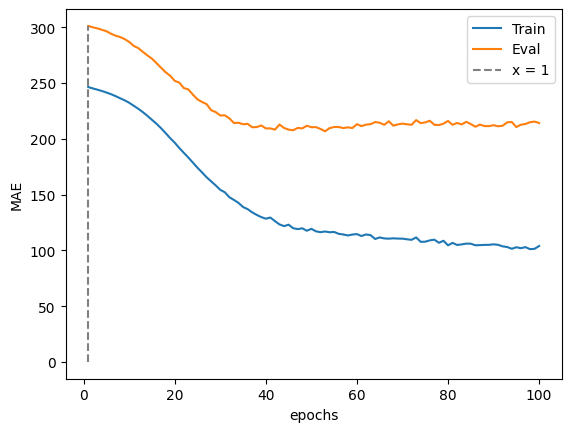

Epoch 001: | Train Loss: 177050.02749 | Val Loss: 348846.50293 | Train Acc: 248.126| Val Acc: 279.234
Epoch 002: | Train Loss: 175342.33699 | Val Loss: 347051.31055 | Train Acc: 246.843| Val Acc: 278.170
Epoch 003: | Train Loss: 173831.80919 | Val Loss: 345231.63900 | Train Acc: 245.728| Val Acc: 276.995
Epoch 004: | Train Loss: 172316.91917 | Val Loss: 343361.75358 | Train Acc: 244.547| Val Acc: 275.630
Epoch 005: | Train Loss: 170655.41526 | Val Loss: 341206.82357 | Train Acc: 243.256| Val Acc: 274.149
Epoch 006: | Train Loss: 168801.31370 | Val Loss: 338979.29883 | Train Acc: 241.677| Val Acc: 272.634
Epoch 007: | Train Loss: 166589.60126 | Val Loss: 335931.54753 | Train Acc: 239.991| Val Acc: 270.622
Epoch 008: | Train Loss: 164291.82422 | Val Loss: 332863.67513 | Train Acc: 238.282| Val Acc: 268.578
Epoch 009: | Train Loss: 161724.01337 | Val Loss: 330354.63314 | Train Acc: 236.325| Val Acc: 267.050
Epoch 010: | Train Loss: 159170.57166 | Val Loss: 326365.33854 | Train Acc: 234.03

Epoch 082: | Train Loss: 27345.81205 | Val Loss: 186893.23584 | Train Acc: 108.640| Val Acc: 203.433
Epoch 083: | Train Loss: 26965.52800 | Val Loss: 189492.14290 | Train Acc: 108.050| Val Acc: 200.963
Epoch 084: | Train Loss: 26945.97440 | Val Loss: 189480.61556 | Train Acc: 109.211| Val Acc: 204.912
Epoch 085: | Train Loss: 27426.94477 | Val Loss: 190260.33398 | Train Acc: 110.165| Val Acc: 205.676
Epoch 086: | Train Loss: 27358.25376 | Val Loss: 190169.29590 | Train Acc: 108.871| Val Acc: 202.830
Epoch 087: | Train Loss: 26485.17721 | Val Loss: 186901.94401 | Train Acc: 107.095| Val Acc: 201.702
Epoch 088: | Train Loss: 26067.45634 | Val Loss: 186754.11947 | Train Acc: 106.601| Val Acc: 201.067
Epoch 089: | Train Loss: 25401.15159 | Val Loss: 187176.81836 | Train Acc: 105.354| Val Acc: 202.488
Epoch 090: | Train Loss: 25615.75533 | Val Loss: 188704.13005 | Train Acc: 107.023| Val Acc: 201.425
Epoch 091: | Train Loss: 25897.81239 | Val Loss: 187221.94027 | Train Acc: 106.891| Val Acc

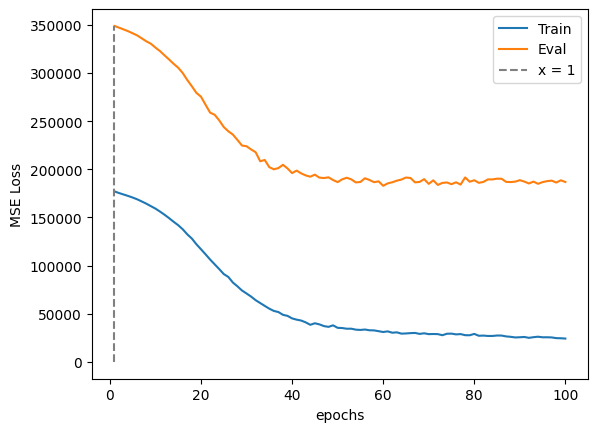

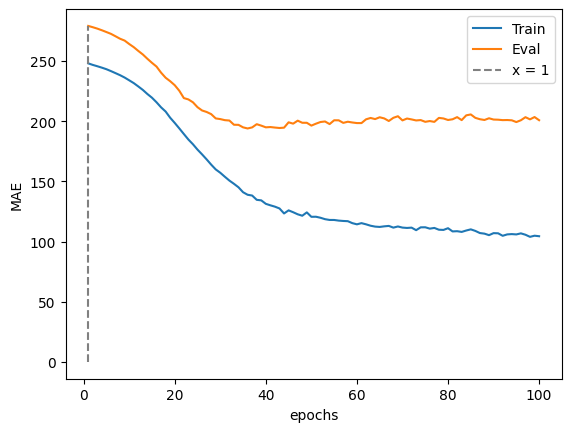

Epoch 001: | Train Loss: 173108.59555 | Val Loss: 440240.08464 | Train Acc: 245.826| Val Acc: 309.393
Epoch 002: | Train Loss: 171449.75210 | Val Loss: 438039.12500 | Train Acc: 244.516| Val Acc: 308.351
Epoch 003: | Train Loss: 170015.55574 | Val Loss: 436345.23047 | Train Acc: 243.445| Val Acc: 307.454
Epoch 004: | Train Loss: 168485.99114 | Val Loss: 434149.69596 | Train Acc: 242.272| Val Acc: 306.234
Epoch 005: | Train Loss: 166722.39258 | Val Loss: 431823.71680 | Train Acc: 240.928| Val Acc: 304.856
Epoch 006: | Train Loss: 164856.84165 | Val Loss: 429255.02799 | Train Acc: 239.426| Val Acc: 303.196
Epoch 007: | Train Loss: 162748.12545 | Val Loss: 425439.96940 | Train Acc: 237.753| Val Acc: 300.885
Epoch 008: | Train Loss: 160387.62876 | Val Loss: 423075.28385 | Train Acc: 235.996| Val Acc: 299.575
Epoch 009: | Train Loss: 158011.76487 | Val Loss: 419384.37305 | Train Acc: 233.962| Val Acc: 297.128
Epoch 010: | Train Loss: 155263.96965 | Val Loss: 414957.09180 | Train Acc: 231.76

Epoch 082: | Train Loss: 26959.29612 | Val Loss: 228529.37923 | Train Acc: 109.185| Val Acc: 211.986
Epoch 083: | Train Loss: 26794.23075 | Val Loss: 230173.84049 | Train Acc: 108.717| Val Acc: 212.532
Epoch 084: | Train Loss: 26670.63909 | Val Loss: 229198.37109 | Train Acc: 108.711| Val Acc: 211.538
Epoch 085: | Train Loss: 25747.13816 | Val Loss: 227312.80794 | Train Acc: 106.950| Val Acc: 210.628
Epoch 086: | Train Loss: 26133.22865 | Val Loss: 230954.03711 | Train Acc: 106.883| Val Acc: 211.637
Epoch 087: | Train Loss: 24797.42815 | Val Loss: 226952.15755 | Train Acc: 105.278| Val Acc: 213.188
Epoch 088: | Train Loss: 25902.26112 | Val Loss: 229200.43945 | Train Acc: 106.603| Val Acc: 213.227
Epoch 089: | Train Loss: 25116.41536 | Val Loss: 226834.32194 | Train Acc: 105.393| Val Acc: 209.872
Epoch 090: | Train Loss: 24484.40129 | Val Loss: 226310.73763 | Train Acc: 104.539| Val Acc: 214.017
Epoch 091: | Train Loss: 24502.84446 | Val Loss: 229692.66602 | Train Acc: 104.697| Val Acc

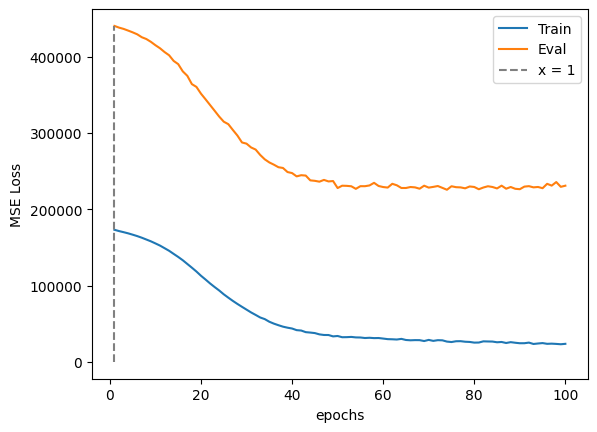

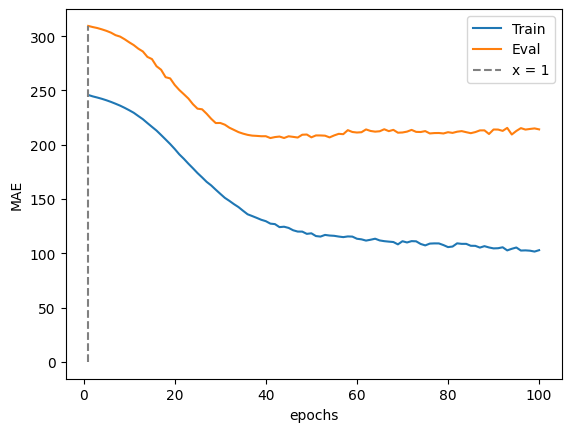

Epoch 001: | Train Loss: 181919.95598 | Val Loss: 323444.52539 | Train Acc: 251.150| Val Acc: 261.071
Epoch 002: | Train Loss: 180212.86448 | Val Loss: 321502.50944 | Train Acc: 249.864| Val Acc: 259.846
Epoch 003: | Train Loss: 178758.94050 | Val Loss: 319941.03092 | Train Acc: 248.757| Val Acc: 258.850
Epoch 004: | Train Loss: 177203.35006 | Val Loss: 318362.80339 | Train Acc: 247.567| Val Acc: 257.838
Epoch 005: | Train Loss: 175509.40640 | Val Loss: 315963.53874 | Train Acc: 246.192| Val Acc: 256.014
Epoch 006: | Train Loss: 173601.37350 | Val Loss: 313702.42220 | Train Acc: 244.706| Val Acc: 254.596
Epoch 007: | Train Loss: 171317.61163 | Val Loss: 311420.52246 | Train Acc: 242.986| Val Acc: 253.062
Epoch 008: | Train Loss: 169151.92623 | Val Loss: 307792.13965 | Train Acc: 241.233| Val Acc: 250.451
Epoch 009: | Train Loss: 166465.31956 | Val Loss: 305480.01237 | Train Acc: 239.239| Val Acc: 249.153
Epoch 010: | Train Loss: 163759.45763 | Val Loss: 301899.17350 | Train Acc: 237.06

Epoch 082: | Train Loss: 27677.48601 | Val Loss: 164336.62174 | Train Acc: 109.840| Val Acc: 184.049
Epoch 083: | Train Loss: 26708.89355 | Val Loss: 163661.91260 | Train Acc: 109.432| Val Acc: 183.793
Epoch 084: | Train Loss: 27588.02738 | Val Loss: 162996.26709 | Train Acc: 110.555| Val Acc: 183.606
Epoch 085: | Train Loss: 27201.35605 | Val Loss: 160993.76497 | Train Acc: 108.977| Val Acc: 180.820
Epoch 086: | Train Loss: 28003.92717 | Val Loss: 164824.30745 | Train Acc: 110.488| Val Acc: 183.670
Epoch 087: | Train Loss: 26469.83688 | Val Loss: 165917.99788 | Train Acc: 108.756| Val Acc: 186.527
Epoch 088: | Train Loss: 26960.67204 | Val Loss: 167005.16895 | Train Acc: 109.045| Val Acc: 186.310
Epoch 089: | Train Loss: 26638.95686 | Val Loss: 167626.35465 | Train Acc: 109.283| Val Acc: 186.195
Epoch 090: | Train Loss: 25533.12571 | Val Loss: 167832.40592 | Train Acc: 107.208| Val Acc: 187.306
Epoch 091: | Train Loss: 26122.24872 | Val Loss: 166233.68066 | Train Acc: 107.189| Val Acc

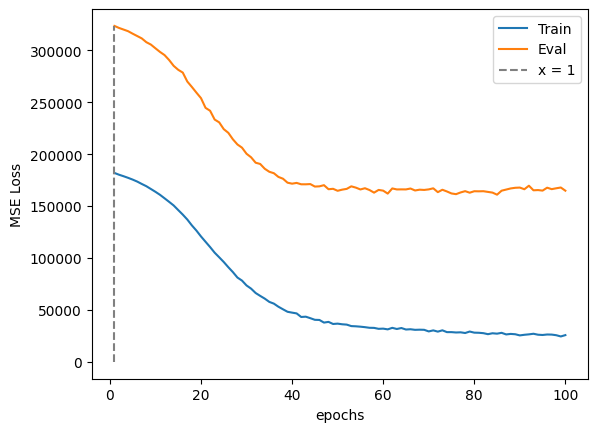

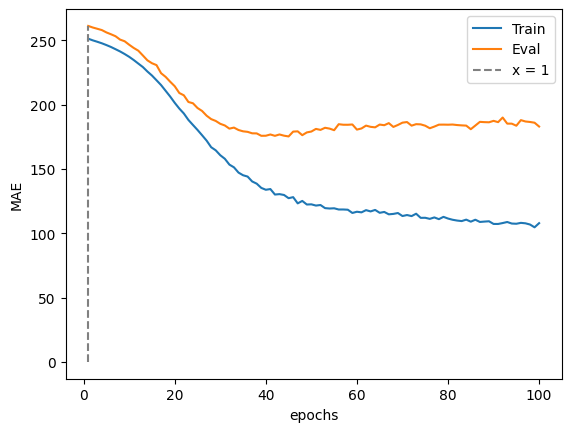

Epoch 001: | Train Loss: 174331.37440 | Val Loss: 342320.18945 | Train Acc: 247.183| Val Acc: 285.193
Epoch 002: | Train Loss: 172682.17503 | Val Loss: 339862.84277 | Train Acc: 245.885| Val Acc: 283.853
Epoch 003: | Train Loss: 171228.72867 | Val Loss: 337750.59440 | Train Acc: 244.786| Val Acc: 282.625
Epoch 004: | Train Loss: 169671.85817 | Val Loss: 335232.00944 | Train Acc: 243.575| Val Acc: 281.017
Epoch 005: | Train Loss: 167897.97806 | Val Loss: 332946.44889 | Train Acc: 242.168| Val Acc: 279.504
Epoch 006: | Train Loss: 166052.67533 | Val Loss: 329805.65267 | Train Acc: 240.703| Val Acc: 277.576
Epoch 007: | Train Loss: 163982.60186 | Val Loss: 326072.53320 | Train Acc: 239.004| Val Acc: 275.163
Epoch 008: | Train Loss: 161660.61719 | Val Loss: 323219.69499 | Train Acc: 237.129| Val Acc: 273.551
Epoch 009: | Train Loss: 158975.92939 | Val Loss: 319941.11426 | Train Acc: 235.071| Val Acc: 271.298
Epoch 010: | Train Loss: 156181.61599 | Val Loss: 314866.06413 | Train Acc: 232.77

Epoch 082: | Train Loss: 26638.16463 | Val Loss: 163450.74902 | Train Acc: 108.142| Val Acc: 198.120
Epoch 083: | Train Loss: 25895.22776 | Val Loss: 158058.44173 | Train Acc: 106.961| Val Acc: 192.759
Epoch 084: | Train Loss: 26412.04791 | Val Loss: 160015.25016 | Train Acc: 107.620| Val Acc: 196.308
Epoch 085: | Train Loss: 25276.17417 | Val Loss: 158092.77132 | Train Acc: 106.476| Val Acc: 194.046
Epoch 086: | Train Loss: 25855.86043 | Val Loss: 160768.98633 | Train Acc: 107.400| Val Acc: 196.056
Epoch 087: | Train Loss: 25904.12577 | Val Loss: 159580.66553 | Train Acc: 106.844| Val Acc: 194.493
Epoch 088: | Train Loss: 25279.45893 | Val Loss: 158419.44613 | Train Acc: 106.212| Val Acc: 195.477
Epoch 089: | Train Loss: 25165.31836 | Val Loss: 160558.98747 | Train Acc: 106.474| Val Acc: 195.005
Epoch 090: | Train Loss: 25412.17604 | Val Loss: 160743.97217 | Train Acc: 106.252| Val Acc: 194.418
Epoch 091: | Train Loss: 24462.91233 | Val Loss: 162906.47510 | Train Acc: 103.911| Val Acc

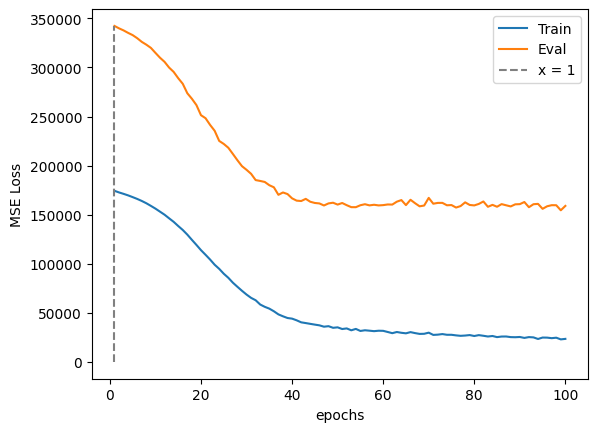

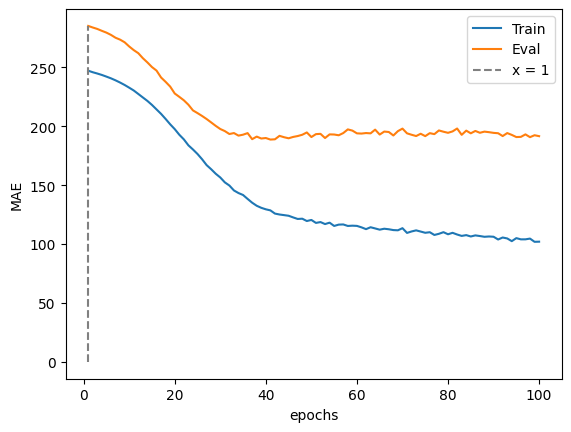

Epoch 001: | Train Loss: 181952.15279 | Val Loss: 262774.61784 | Train Acc: 251.187| Val Acc: 250.353
Epoch 002: | Train Loss: 180252.49850 | Val Loss: 260918.97168 | Train Acc: 249.865| Val Acc: 249.123
Epoch 003: | Train Loss: 178757.22776 | Val Loss: 259223.53613 | Train Acc: 248.775| Val Acc: 247.916
Epoch 004: | Train Loss: 177207.72160 | Val Loss: 257522.69173 | Train Acc: 247.602| Val Acc: 246.779
Epoch 005: | Train Loss: 175496.64799 | Val Loss: 255415.88281 | Train Acc: 246.240| Val Acc: 245.102
Epoch 006: | Train Loss: 173490.14408 | Val Loss: 253185.25293 | Train Acc: 244.711| Val Acc: 243.660
Epoch 007: | Train Loss: 171225.38371 | Val Loss: 251074.09831 | Train Acc: 242.980| Val Acc: 241.979
Epoch 008: | Train Loss: 168928.04627 | Val Loss: 248457.55501 | Train Acc: 241.268| Val Acc: 240.160
Epoch 009: | Train Loss: 166373.79041 | Val Loss: 245343.26986 | Train Acc: 239.180| Val Acc: 237.747
Epoch 010: | Train Loss: 163315.22040 | Val Loss: 241545.03125 | Train Acc: 236.73

Epoch 082: | Train Loss: 27387.53076 | Val Loss: 144870.88835 | Train Acc: 109.084| Val Acc: 180.779
Epoch 083: | Train Loss: 26007.61277 | Val Loss: 140911.93896 | Train Acc: 106.461| Val Acc: 178.472
Epoch 084: | Train Loss: 26326.61061 | Val Loss: 142163.91406 | Train Acc: 108.126| Val Acc: 177.573
Epoch 085: | Train Loss: 26910.14111 | Val Loss: 141481.15007 | Train Acc: 108.989| Val Acc: 179.956
Epoch 086: | Train Loss: 26306.23637 | Val Loss: 143391.88737 | Train Acc: 106.768| Val Acc: 181.615
Epoch 087: | Train Loss: 25804.40309 | Val Loss: 143480.76465 | Train Acc: 107.172| Val Acc: 179.140
Epoch 088: | Train Loss: 25926.33166 | Val Loss: 143428.17611 | Train Acc: 106.909| Val Acc: 183.468
Epoch 089: | Train Loss: 25096.69612 | Val Loss: 140479.60091 | Train Acc: 105.877| Val Acc: 178.946
Epoch 090: | Train Loss: 25880.91271 | Val Loss: 142543.48438 | Train Acc: 106.415| Val Acc: 181.148
Epoch 091: | Train Loss: 25001.39866 | Val Loss: 144011.82568 | Train Acc: 106.467| Val Acc

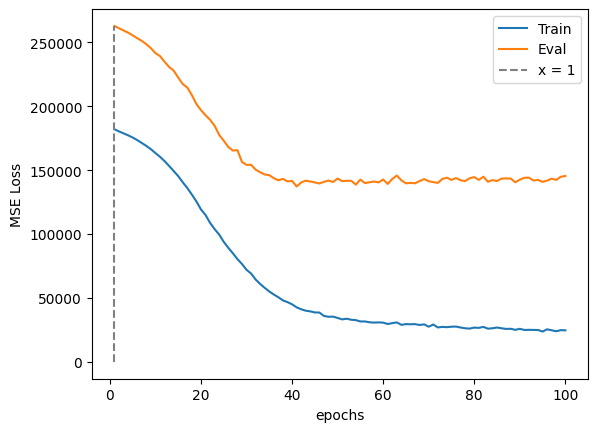

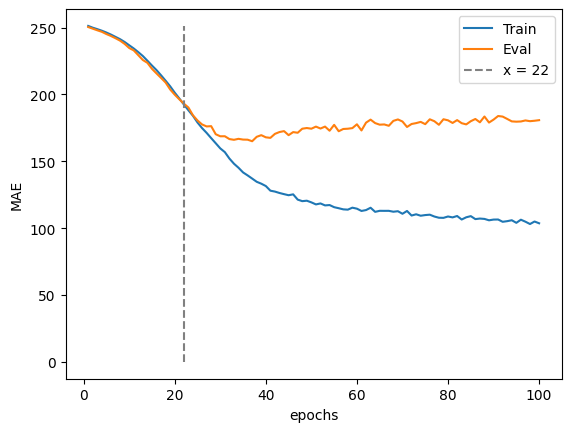

MAE on train set:  92.55740035081352
min prediction: 4
max prediction: 1453

MAE on test set:  201.5213663581927
Error <= 30: 25.86 %
min prediction: 6
max prediction: 1349


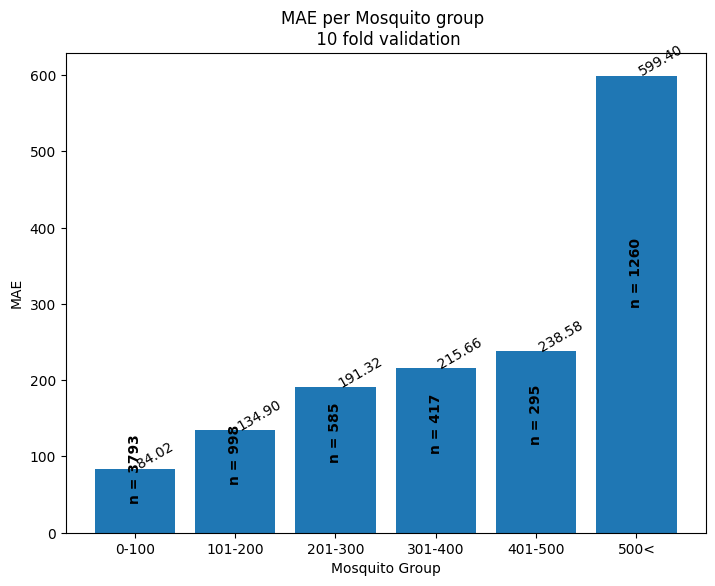

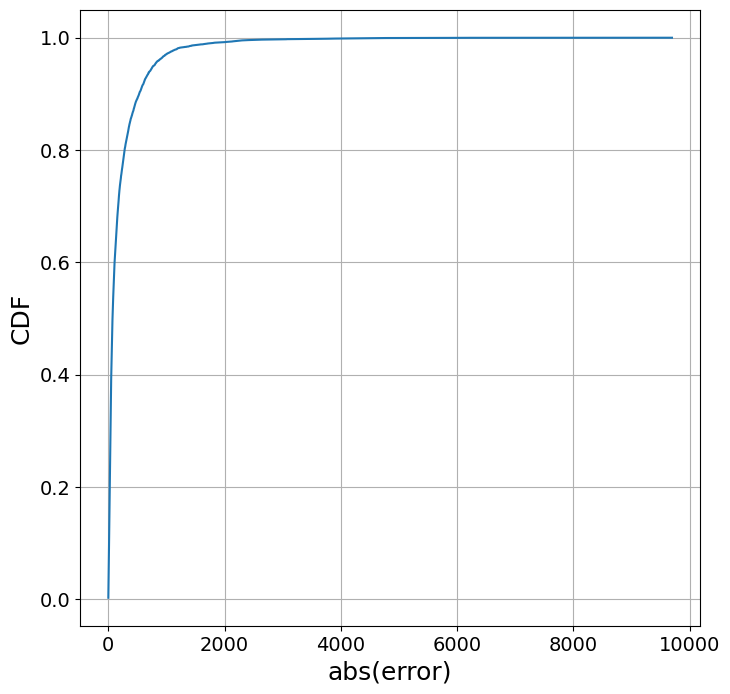

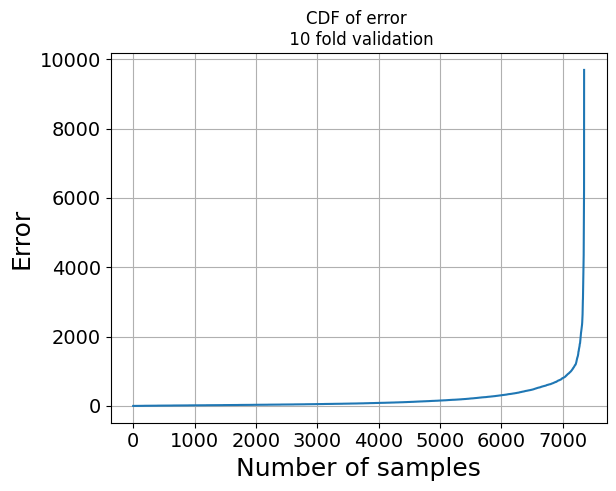

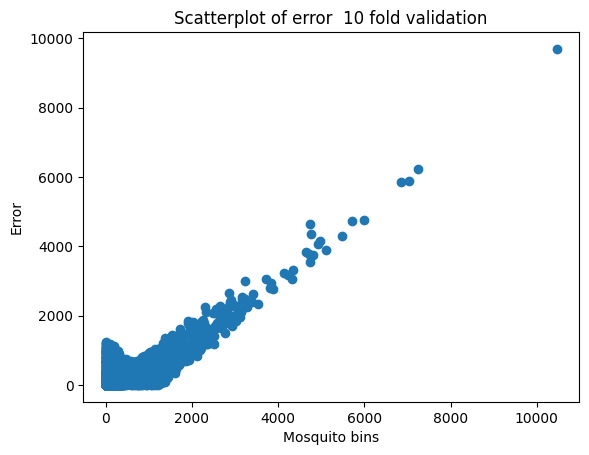

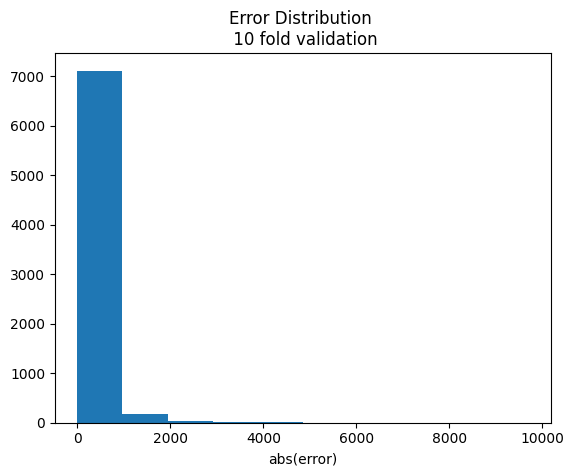

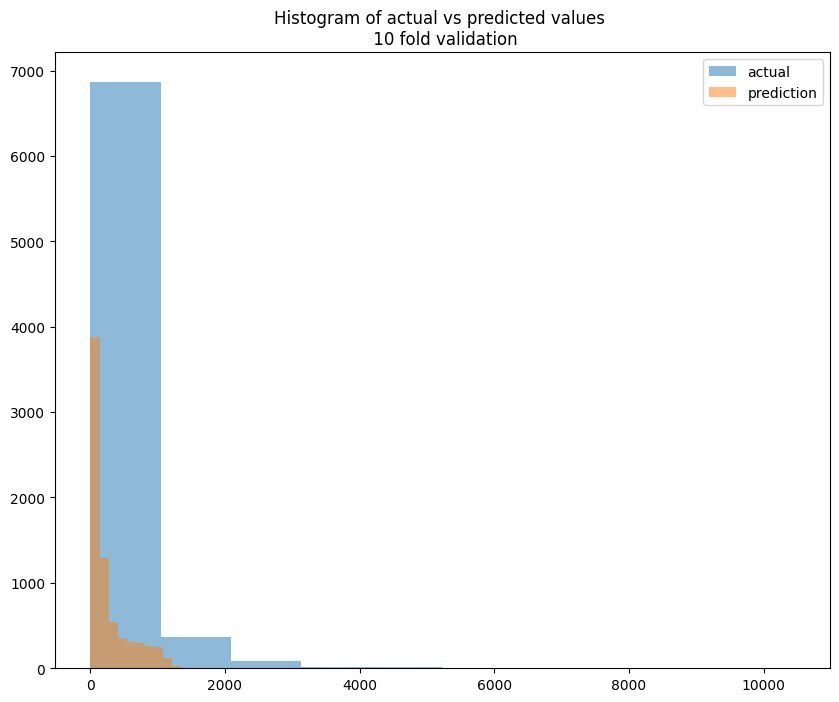

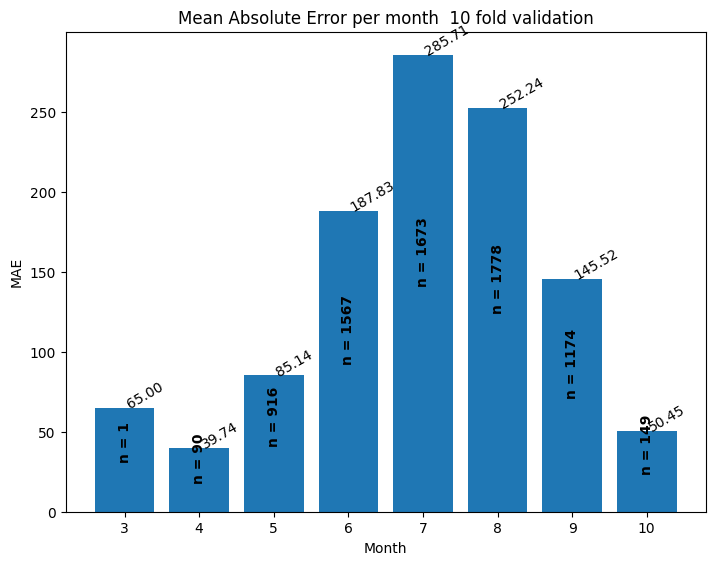

In [11]:
train_model_KFold(data, model, date_col='dt_placement', case='')

Epoch 001: | Train Loss: 184491.61644 | Val Loss: 2554.08789 | Train Acc: 255.893| Val Acc: 24.132
Epoch 002: | Train Loss: 182755.34540 | Val Loss: 2554.08789 | Train Acc: 254.594| Val Acc: 24.132
Epoch 003: | Train Loss: 181227.48558 | Val Loss: 2554.08789 | Train Acc: 253.463| Val Acc: 24.132
Epoch 004: | Train Loss: 179713.98032 | Val Loss: 2554.08789 | Train Acc: 252.281| Val Acc: 24.132
Epoch 005: | Train Loss: 177786.01908 | Val Loss: 2554.08789 | Train Acc: 250.817| Val Acc: 24.132
Epoch 006: | Train Loss: 175814.66602 | Val Loss: 2554.08789 | Train Acc: 249.258| Val Acc: 24.132
Epoch 007: | Train Loss: 173698.88702 | Val Loss: 2554.08789 | Train Acc: 247.594| Val Acc: 24.132
Epoch 008: | Train Loss: 171415.74459 | Val Loss: 2554.08789 | Train Acc: 245.659| Val Acc: 24.132
Epoch 009: | Train Loss: 168832.52614 | Val Loss: 2554.08789 | Train Acc: 243.687| Val Acc: 24.132
Epoch 010: | Train Loss: 166009.87846 | Val Loss: 2552.04077 | Train Acc: 241.456| Val Acc: 24.132
Epoch 011:

Epoch 085: | Train Loss: 27645.51236 | Val Loss: 1812.48950 | Train Acc: 110.424| Val Acc: 26.868
Epoch 086: | Train Loss: 26663.98051 | Val Loss: 1835.96167 | Train Acc: 109.877| Val Acc: 25.769
Epoch 087: | Train Loss: 26801.22142 | Val Loss: 1764.55603 | Train Acc: 109.002| Val Acc: 26.538
Epoch 088: | Train Loss: 26854.50503 | Val Loss: 1778.20215 | Train Acc: 109.465| Val Acc: 26.604
Epoch 089: | Train Loss: 26356.92244 | Val Loss: 1878.66516 | Train Acc: 108.683| Val Acc: 26.989
Epoch 090: | Train Loss: 25757.36970 | Val Loss: 1854.84460 | Train Acc: 107.426| Val Acc: 29.308
Epoch 091: | Train Loss: 26244.15013 | Val Loss: 1890.03833 | Train Acc: 108.258| Val Acc: 28.000
Epoch 092: | Train Loss: 25527.68160 | Val Loss: 1922.01855 | Train Acc: 107.706| Val Acc: 29.912
Epoch 093: | Train Loss: 25668.90880 | Val Loss: 1876.88586 | Train Acc: 107.857| Val Acc: 29.626
Epoch 094: | Train Loss: 25842.04308 | Val Loss: 1805.85889 | Train Acc: 107.465| Val Acc: 29.923
Epoch 095: | Train L

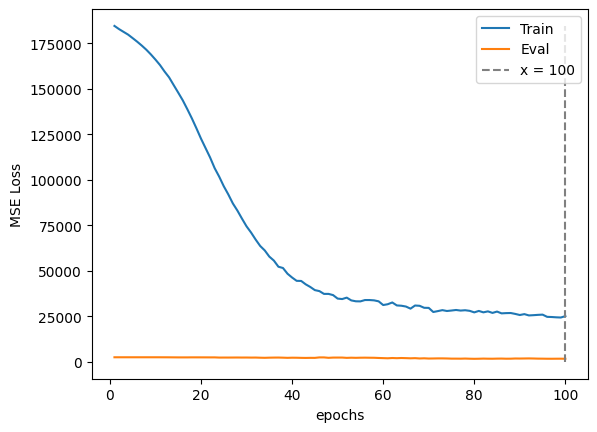

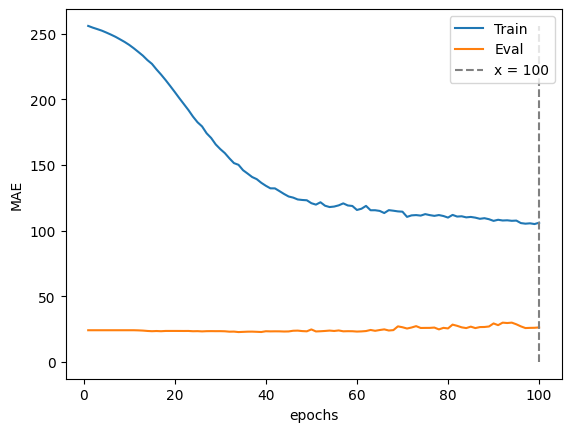

Epoch 001: | Train Loss: 37067.99760 | Val Loss: 105666.42725 | Train Acc: 123.815| Val Acc: 141.014
Epoch 002: | Train Loss: 33772.93356 | Val Loss: 111576.85254 | Train Acc: 120.504| Val Acc: 148.365
Epoch 003: | Train Loss: 31428.29503 | Val Loss: 107437.83887 | Train Acc: 116.386| Val Acc: 144.283
Epoch 004: | Train Loss: 32253.09943 | Val Loss: 106429.53711 | Train Acc: 117.053| Val Acc: 142.867
Epoch 005: | Train Loss: 31182.12439 | Val Loss: 115388.05664 | Train Acc: 115.248| Val Acc: 150.991
Epoch 006: | Train Loss: 30872.32365 | Val Loss: 106361.51904 | Train Acc: 114.998| Val Acc: 139.965
Epoch 007: | Train Loss: 30922.63653 | Val Loss: 106465.41113 | Train Acc: 114.422| Val Acc: 140.210
Epoch 008: | Train Loss: 32620.25339 | Val Loss: 107559.42871 | Train Acc: 117.045| Val Acc: 143.811
Epoch 009: | Train Loss: 29847.29065 | Val Loss: 106152.31543 | Train Acc: 113.054| Val Acc: 140.059
Epoch 010: | Train Loss: 30022.02845 | Val Loss: 108300.38135 | Train Acc: 113.947| Val Acc

Epoch 083: | Train Loss: 21403.43055 | Val Loss: 107301.47168 | Train Acc: 98.732| Val Acc: 142.928
Epoch 084: | Train Loss: 21055.24460 | Val Loss: 108253.56348 | Train Acc: 97.431| Val Acc: 145.495
Epoch 085: | Train Loss: 21399.45845 | Val Loss: 115648.88379 | Train Acc: 98.529| Val Acc: 151.473
Epoch 086: | Train Loss: 21391.19852 | Val Loss: 108467.01562 | Train Acc: 98.446| Val Acc: 145.972
Epoch 087: | Train Loss: 20841.98268 | Val Loss: 106923.59766 | Train Acc: 97.016| Val Acc: 142.730
Epoch 088: | Train Loss: 20632.58047 | Val Loss: 107535.72998 | Train Acc: 96.864| Val Acc: 143.974
Epoch 089: | Train Loss: 21185.41550 | Val Loss: 107150.41309 | Train Acc: 97.884| Val Acc: 143.877
Epoch 090: | Train Loss: 21211.50603 | Val Loss: 106348.50439 | Train Acc: 97.941| Val Acc: 141.577
Epoch 091: | Train Loss: 21492.54061 | Val Loss: 107960.23438 | Train Acc: 97.661| Val Acc: 144.369
Epoch 092: | Train Loss: 21810.51253 | Val Loss: 111171.12891 | Train Acc: 98.896| Val Acc: 147.996


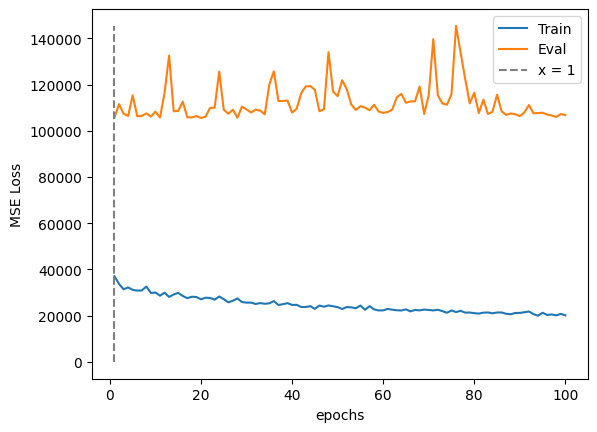

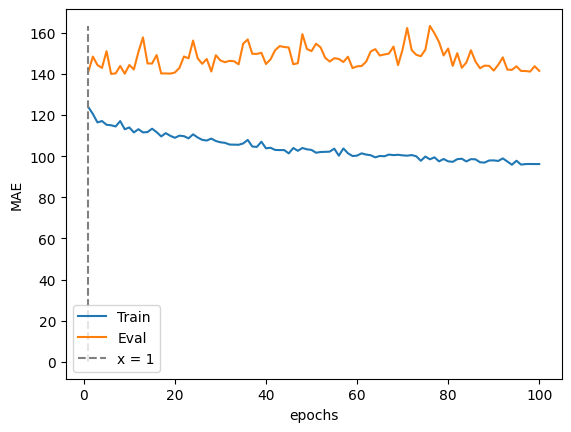

Epoch 001: | Train Loss: 32862.67518 | Val Loss: 67591.96143 | Train Acc: 116.496| Val Acc: 136.268
Epoch 002: | Train Loss: 29772.39576 | Val Loss: 64306.83838 | Train Acc: 111.025| Val Acc: 134.141
Epoch 003: | Train Loss: 27137.85913 | Val Loss: 56549.69678 | Train Acc: 106.995| Val Acc: 133.477
Epoch 004: | Train Loss: 28354.88077 | Val Loss: 55181.92041 | Train Acc: 109.578| Val Acc: 138.961
Epoch 005: | Train Loss: 27674.42757 | Val Loss: 54285.05762 | Train Acc: 108.867| Val Acc: 142.223
Epoch 006: | Train Loss: 27505.00431 | Val Loss: 51930.11035 | Train Acc: 108.723| Val Acc: 143.311
Epoch 007: | Train Loss: 27787.37390 | Val Loss: 51166.94629 | Train Acc: 109.167| Val Acc: 142.280
Epoch 008: | Train Loss: 25664.82752 | Val Loss: 49361.60449 | Train Acc: 105.566| Val Acc: 141.216
Epoch 009: | Train Loss: 26472.77821 | Val Loss: 53333.32324 | Train Acc: 106.157| Val Acc: 159.919
Epoch 010: | Train Loss: 25917.27186 | Val Loss: 46188.98438 | Train Acc: 105.851| Val Acc: 137.561


Epoch 084: | Train Loss: 18953.24306 | Val Loss: 52135.28564 | Train Acc: 92.698| Val Acc: 137.171
Epoch 085: | Train Loss: 19207.52953 | Val Loss: 52603.05225 | Train Acc: 92.367| Val Acc: 136.770
Epoch 086: | Train Loss: 18106.10724 | Val Loss: 53434.16162 | Train Acc: 91.130| Val Acc: 133.949
Epoch 087: | Train Loss: 18343.34851 | Val Loss: 56130.18115 | Train Acc: 90.555| Val Acc: 134.880
Epoch 088: | Train Loss: 18989.33306 | Val Loss: 55053.57959 | Train Acc: 92.599| Val Acc: 132.645
Epoch 089: | Train Loss: 18614.00154 | Val Loss: 61079.99512 | Train Acc: 91.855| Val Acc: 151.171
Epoch 090: | Train Loss: 19495.39123 | Val Loss: 67761.01953 | Train Acc: 93.342| Val Acc: 159.368
Epoch 091: | Train Loss: 19253.25763 | Val Loss: 58416.10059 | Train Acc: 92.628| Val Acc: 147.426
Epoch 092: | Train Loss: 18131.59155 | Val Loss: 53789.61914 | Train Acc: 90.700| Val Acc: 134.409
Epoch 093: | Train Loss: 18845.80215 | Val Loss: 58849.20459 | Train Acc: 92.744| Val Acc: 148.900
Epoch 094:

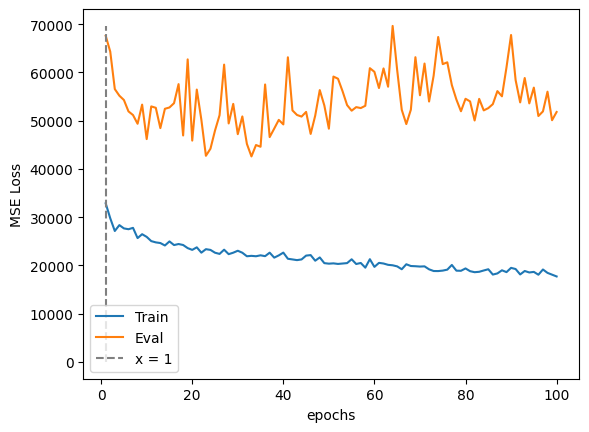

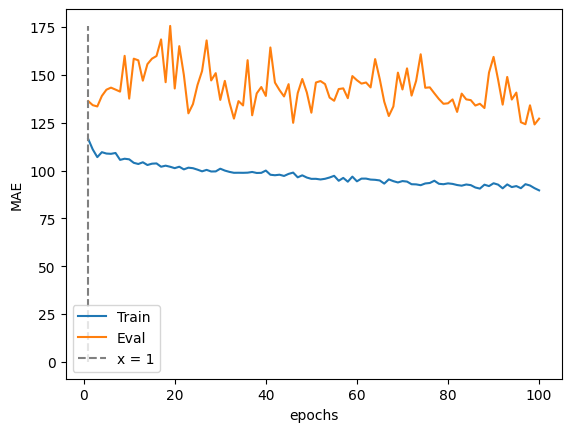

Epoch 001: | Train Loss: 27336.12322 | Val Loss: 216488.95703 | Train Acc: 106.334| Val Acc: 201.618
Epoch 002: | Train Loss: 25596.94050 | Val Loss: 216215.08496 | Train Acc: 103.907| Val Acc: 198.931
Epoch 003: | Train Loss: 25619.10446 | Val Loss: 218445.59961 | Train Acc: 105.019| Val Acc: 197.940
Epoch 004: | Train Loss: 24069.40215 | Val Loss: 218774.60840 | Train Acc: 100.775| Val Acc: 199.006
Epoch 005: | Train Loss: 23883.09617 | Val Loss: 221249.06738 | Train Acc: 101.268| Val Acc: 198.579
Epoch 006: | Train Loss: 22765.34902 | Val Loss: 213764.18652 | Train Acc: 98.842| Val Acc: 199.158
Epoch 007: | Train Loss: 22987.96034 | Val Loss: 219428.10156 | Train Acc: 99.718| Val Acc: 200.602
Epoch 008: | Train Loss: 22428.12308 | Val Loss: 218841.50781 | Train Acc: 99.135| Val Acc: 199.805
Epoch 009: | Train Loss: 23177.84499 | Val Loss: 219506.15918 | Train Acc: 100.656| Val Acc: 198.973
Epoch 010: | Train Loss: 22206.03791 | Val Loss: 221000.56445 | Train Acc: 98.536| Val Acc: 19

Epoch 083: | Train Loss: 17133.91012 | Val Loss: 219623.64062 | Train Acc: 88.459| Val Acc: 200.348
Epoch 084: | Train Loss: 16697.59246 | Val Loss: 220245.20996 | Train Acc: 87.287| Val Acc: 200.523
Epoch 085: | Train Loss: 17275.37491 | Val Loss: 218182.05273 | Train Acc: 88.301| Val Acc: 202.090
Epoch 086: | Train Loss: 16850.10850 | Val Loss: 218428.60938 | Train Acc: 87.942| Val Acc: 202.809
Epoch 087: | Train Loss: 16770.77576 | Val Loss: 223067.01465 | Train Acc: 87.567| Val Acc: 203.507
Epoch 088: | Train Loss: 17658.84401 | Val Loss: 224250.11426 | Train Acc: 89.171| Val Acc: 205.089
Epoch 089: | Train Loss: 16751.98580 | Val Loss: 221727.54199 | Train Acc: 87.856| Val Acc: 203.422
Epoch 090: | Train Loss: 16441.49700 | Val Loss: 219426.30566 | Train Acc: 86.750| Val Acc: 203.703
Epoch 091: | Train Loss: 16230.88433 | Val Loss: 220499.84863 | Train Acc: 86.114| Val Acc: 204.035
Epoch 092: | Train Loss: 16012.06144 | Val Loss: 221247.57520 | Train Acc: 85.802| Val Acc: 203.081


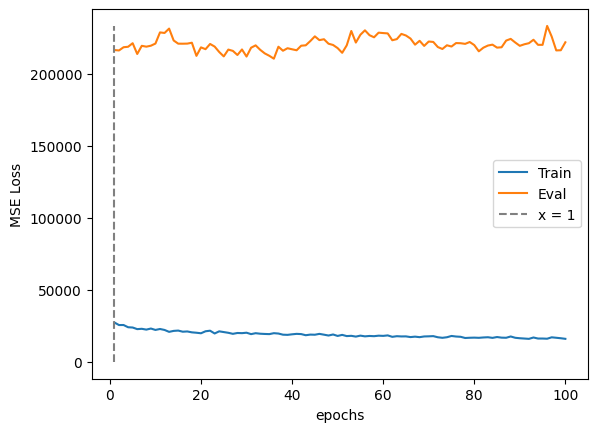

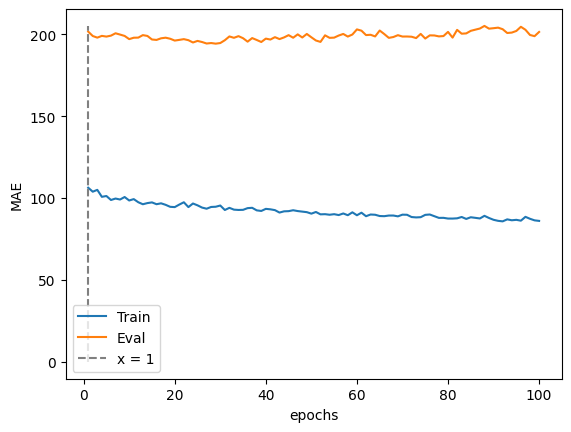

Epoch 001: | Train Loss: 26652.64294 | Val Loss: 129842.39844 | Train Acc: 105.111| Val Acc: 191.655
Epoch 002: | Train Loss: 24365.84574 | Val Loss: 133489.71875 | Train Acc: 101.264| Val Acc: 189.230
Epoch 003: | Train Loss: 23511.19696 | Val Loss: 136881.21875 | Train Acc: 99.122| Val Acc: 188.736
Epoch 004: | Train Loss: 22900.66941 | Val Loss: 136440.53125 | Train Acc: 98.310| Val Acc: 186.759
Epoch 005: | Train Loss: 24146.31850 | Val Loss: 120713.71094 | Train Acc: 100.464| Val Acc: 177.046
Epoch 006: | Train Loss: 22634.68380 | Val Loss: 132280.45312 | Train Acc: 98.171| Val Acc: 179.598
Epoch 007: | Train Loss: 22111.09779 | Val Loss: 128566.88281 | Train Acc: 97.904| Val Acc: 182.989
Epoch 008: | Train Loss: 22865.43743 | Val Loss: 120417.16406 | Train Acc: 97.802| Val Acc: 175.759
Epoch 009: | Train Loss: 22327.54237 | Val Loss: 113061.05469 | Train Acc: 96.984| Val Acc: 173.701
Epoch 010: | Train Loss: 21316.94596 | Val Loss: 112870.61719 | Train Acc: 95.928| Val Acc: 170.8

Epoch 083: | Train Loss: 16465.56269 | Val Loss: 139114.21875 | Train Acc: 86.428| Val Acc: 204.828
Epoch 084: | Train Loss: 16396.36369 | Val Loss: 127271.26562 | Train Acc: 86.366| Val Acc: 202.195
Epoch 085: | Train Loss: 15784.49645 | Val Loss: 134131.54688 | Train Acc: 86.219| Val Acc: 205.828
Epoch 086: | Train Loss: 16227.09534 | Val Loss: 134945.57812 | Train Acc: 86.448| Val Acc: 204.851
Epoch 087: | Train Loss: 15691.26811 | Val Loss: 126278.53125 | Train Acc: 84.166| Val Acc: 201.874
Epoch 088: | Train Loss: 16277.29849 | Val Loss: 143834.50000 | Train Acc: 85.675| Val Acc: 204.368
Epoch 089: | Train Loss: 15982.98155 | Val Loss: 152465.79688 | Train Acc: 84.920| Val Acc: 206.908
Epoch 090: | Train Loss: 15592.20969 | Val Loss: 158178.06250 | Train Acc: 84.226| Val Acc: 211.471
Epoch 091: | Train Loss: 16007.28130 | Val Loss: 139458.81250 | Train Acc: 84.945| Val Acc: 205.092
Epoch 092: | Train Loss: 16122.85661 | Val Loss: 137874.04688 | Train Acc: 85.741| Val Acc: 201.816


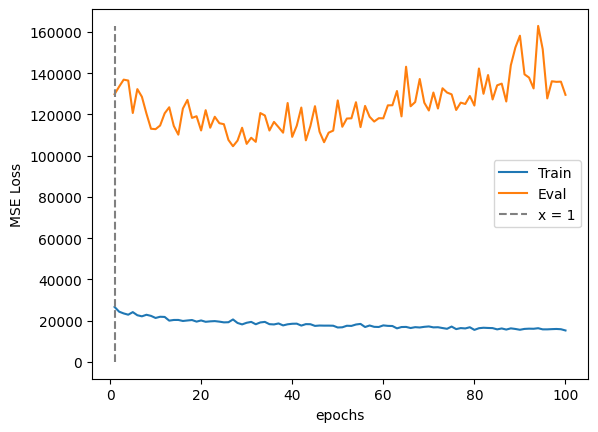

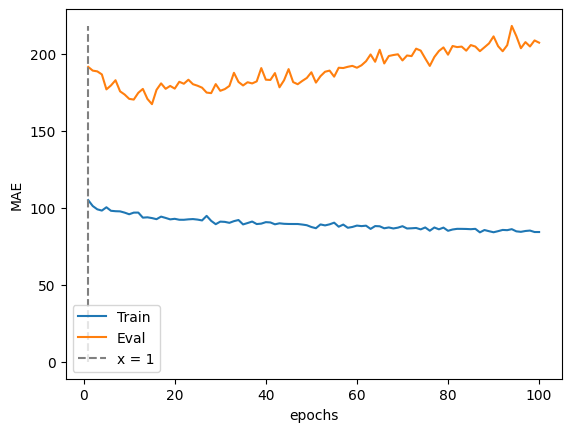

MAE on train set:  71.6575654480452
min prediction: 4
max prediction: 1551

MAE on test set:  172.4422253922967
Error <= 30: 39.51 %
min prediction: 7
max prediction: 1064


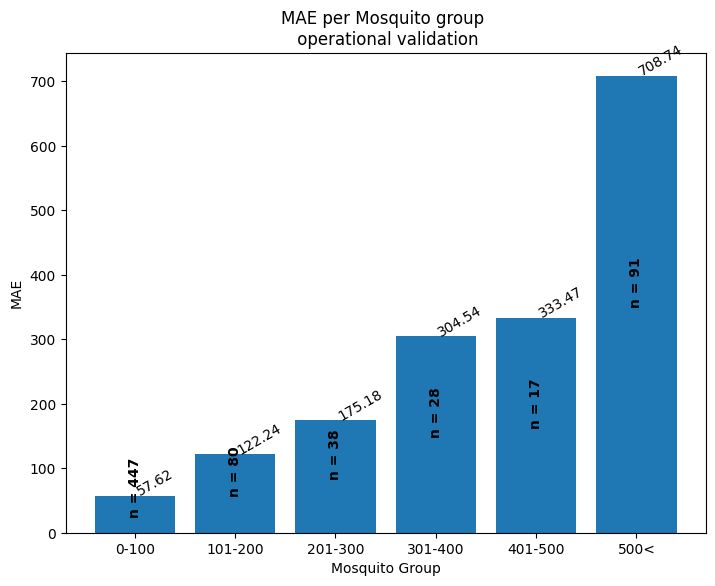

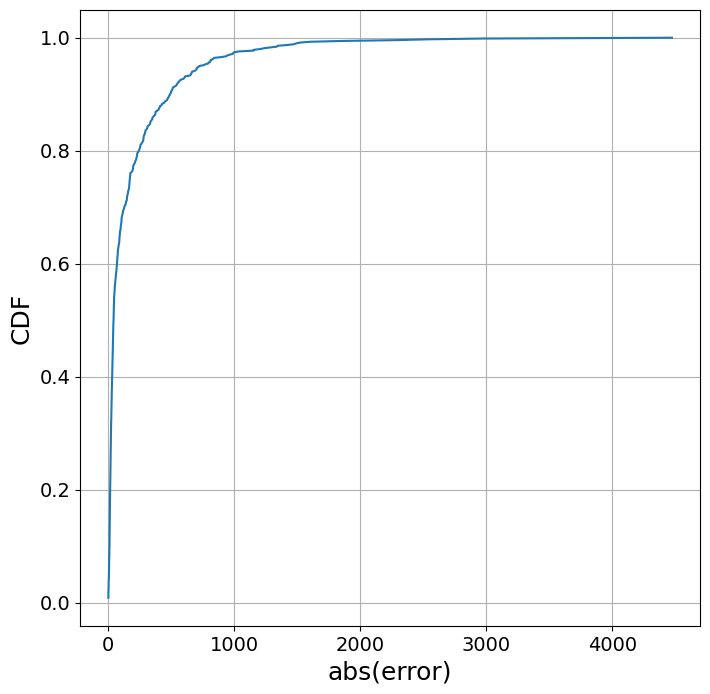

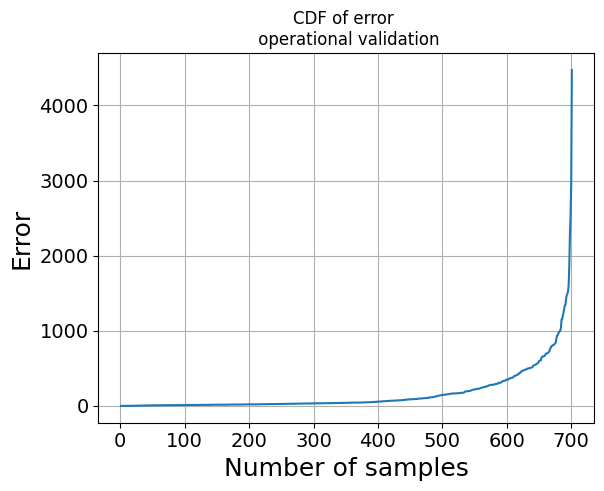

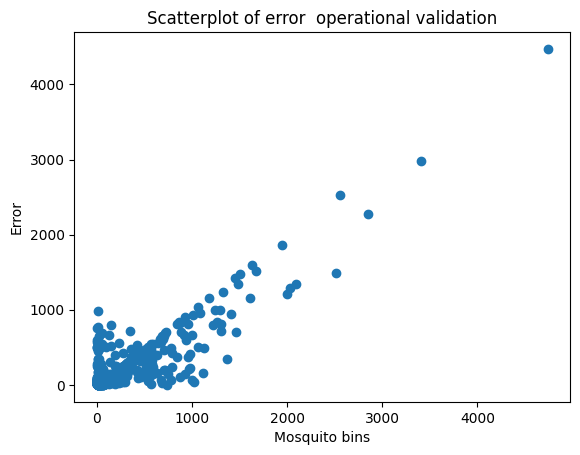

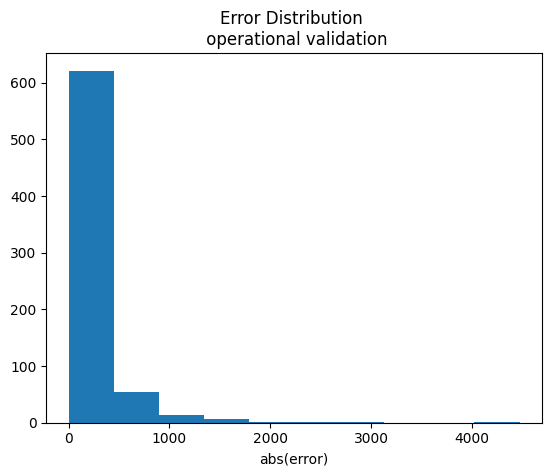

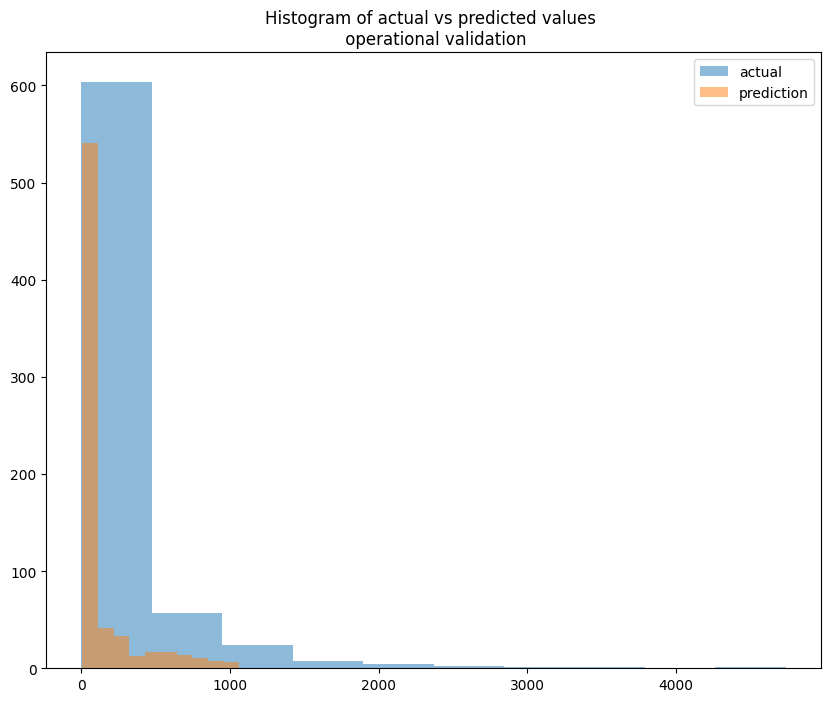

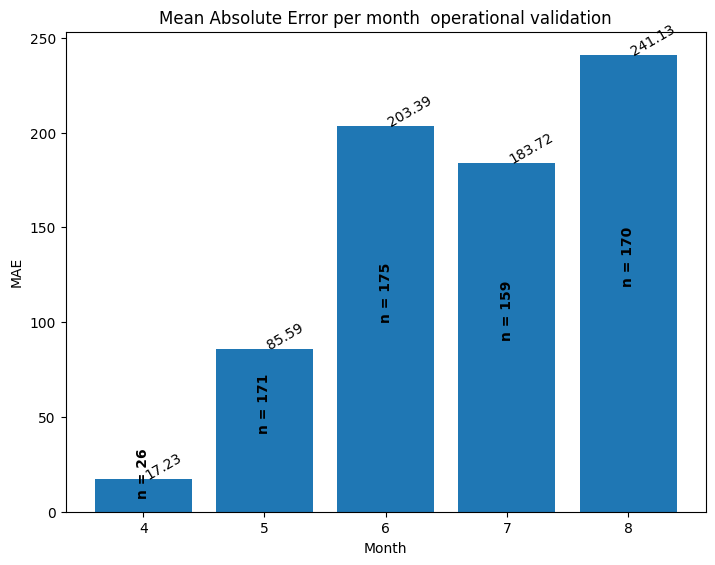

In [9]:
operational_validation(data, model, date='2022-01-01', filepath ='', date_col='dt_placement', case='', fi=False, export=False)